In [27]:
import pandas as pd
import numpy as np
from math import *
import sympy as sym
import numpy as np

#**Diseño de una Piscina** 


> A continuación, se presenta la imagen de una piscina cuyas dimensiones deberán ser determinadas por el usuario (alumno) un arquitecto necesita contar con todas las ecuaciones necesarias de tal manera que se pueda disponer de la siguiente información:


1.   Longitud del perímetro de la piscina.
2.   Volumen aproximado de la cantidad de agua necesaria para llenarla, teniendo en cuenta que la mayor profundidad es de 1.8mt y la menor es de 0.80mt obviamente la mayor y menor profundidad están en los extremos más alejados.
3. Dado que el borde de la piscina tiene la característica de antideslizante entonces será construida de granito vaciado que tiene un costo mucho mas alto que la cerámica, por lo tanto es necesario saber cuál será el metrado de este vaciado (cantidad en metros cuadrados), teniendo en cuenta que el ancho debe ser 0.80mt.
4. Dado que el borde de la piscina tiene la característica de antideslizante entonces será construida de granito vaciado que tiene un costo mucho mas alto que la cerámica, por lo tanto es necesario saber cuál será el metrado de este vaciado (cantidad en metros cuadrados), teniendo en cuenta que el ancho debe ser 0.80mt.





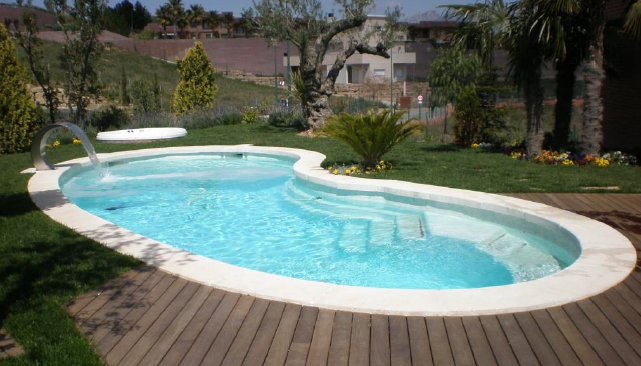

Para encontrar todo lo pedido por el arquitecto vamos a modelar la piscina de acuerdo a funciones.
Para modelar se cogieron las siguintes regiones geométricas. Una semi-elipse de longitud de eje mayor de *a* y menor *b*, una semicircunsferencia  de radio *a* y dos semicircunsferencias de radio *a/2*.
En el ejemplo se escogió el valor  *a = 7* 

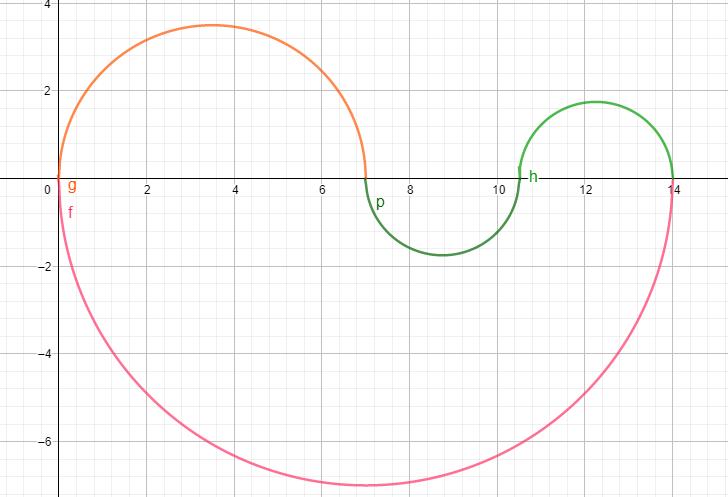



> Las funciones son las siguientes:



$$\varepsilon (x) = -\sqrt{(1-(\frac{x-a}{a})^{2})b^{2}}$$

In [ ]:
#Nuestra variable a será 7 en este ejemplo: (a = longitud del eje mayor de la parabola)
a = 7
#ecuacion de la semielipse
f1 = lambda x: -(((1- (((x-a)/a)**2) )*(a**2))**0.5) #x E [0,2a]

$$C_1(x)=\sqrt{\left(\frac{a}{2}\right)^2-\left(x-\frac{a}{2}\right)^2}$$

In [ ]:
#ecuacion de la semicircunsferencia de radio a
f2 = lambda x: ((a/2)**2 - (x - (1/2)*a)**2)**0.5 #x E [0,a]

$$C_2\left(x\right)=-\sqrt{\left(\frac{a}{4}\right)^2-\left(x-\frac{5a}{4}\right)^2}$$

In [ ]:
#ecuacion de la semicircunsferencia de radio a/2 con valores menores a 0
f3 = lambda x: -(((a/4)**2 - (x - (5/4)*a)**2)**0.5) #x E [a,3(a)/2]

$$C_3\left(x\right)=\sqrt{\left(\frac{a}{4}\right)^2-\left(x-\frac{7a}{4}\right)^2}$$

In [ ]:
f4 = lambda x: ((a/4)**2 - (x - (7/4)*a)**2)**0.5 #x E [3(a)/2,2a]

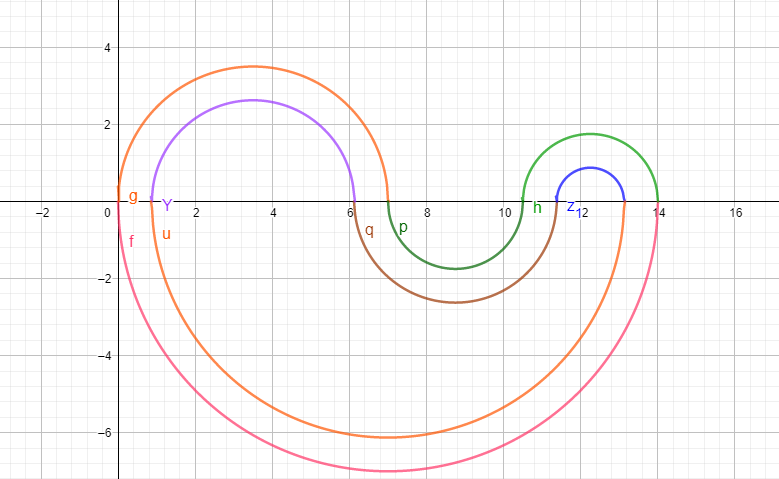



> Ahora podemos modelar el borde siendo la piscina la region geometrica que esta adentro de la más grande. Ahora si las ecuaciones que usaremos seran de las mismas regiones utilizadas anteriormente pero de radio distinto porque este se a reducido a (7/8)*a* (un valor elegido por el usuario) del valor de la elipse dando las siguientes funciones.



$$\mathfrak{E}\left(x\right)=-\sqrt{{\left[1-\left(\frac{x-a}{(\frac{7}{8})a}\right)^2\right](\frac{7}{8}b)}^2}$$

In [ ]:

#ecuacion de la semielpise de la piscina
E1 = lambda x: -(((1- (((x-a)/((7*a)/8))**2) )*(((7*a)/8)**2))**0.5) #x E [a/8,15(a)/8]

$$\mathfrak{C}_1\left(x\right)=\sqrt{\left(\frac{3\ a}{8}\right)^2-\left(x-\frac{a}{2}\right)^2}$$

In [ ]:
#ecuacion de la semicircunsferencia de la piscina
E2 = lambda x: ((3*a/8)**2 - (x - (1/2)*a)**2)**0.5 #x E [a/8,7(a)/8]

$$\mathfrak{C}_2\left(x\right)=-\sqrt{\left(\frac{3\ a}{8}\right)^2-\left(x-\frac{5a}{4}\right)^2}$$

In [ ]:
#ecuacion de la semicircunsferencia de la piscina
E3 = lambda x: -((((3*a)/8)**2 - (x - (5/4)*a)**2)**0.5) #x E [7(a)/8,13(a)/8]

$$\mathfrak{C}_3\left(x\right)=\sqrt{\left(\frac{a}{8}\right)^2-\left(x-\frac{7a}{4}\right)^2}$$

In [ ]:
#ecuacion de la semicircunsferencia de la piscina
E4 = lambda x: ((a/8)**2 - (x - (7/4)*a)**2)**0.5 #x E [13(a)/8,15(a)/8]

1. **Longitud del perímetro de la piscina**


> La longitud del perímetro de la piscina podemos hallar utilizando la longitud del arco de las funciones que la modelan.



$$\ell\ =\int_{a}^{b}\sqrt{1\ +\ \left(\frac{dy}{dx}\right)^2}\ $$
Ajustando para nuestras funciones...
$$L(P)\ =\ \sum_{i=1}^{n}{\sqrt{{(x_i-x_{i-1})}^2\ +{(y_i-y_{i-1})}^2}\ ;\ P={a=x_0,x_1,...,{b=x}_n}},\ x_i=\ a\ +\ h\ i,\ h\ =\ \frac{b-a}{n}$$
Diseñamos  nuestro algoritmo:

In [31]:
def longitud_de_arco(funcion,a,b,n):
  h = (b-a)/n
  suma = 0
  for i in range(1,n+1):
    xi = a + i*h
    x0 = a + (i-1)*h
    yi = funcion(xi)
    y0 = funcion (x0)
    suma += (((xi - x0)**2) + ((yi - y0)**2))**0.5 
  return (suma)


Nuestro perímetro de la psicina esta dado por:
$$\ell\ =\int_{\frac{a}{8}}^{\frac{15}{8}a}\sqrt{1\ +\ \left(\frac{d\mathfrak{E}}{dx}\right)^2}+\int_{\frac{a}{8}}^{\frac{7a}{8}}\sqrt{1\ +\ \left(\frac{d\mathfrak{C}_1}{dx}\right)^2}+\int_{\frac{7a}{8}}^{\frac{13}{8}a}{\sqrt{1\ +\ \left(\frac{d\mathfrak{C}_2}{dx}\right)^2}+\int_{\frac{13}{8}a}^{\frac{15}{8}a}\sqrt{1\ +\ \left(\frac{d\mathfrak{C}_3}{dx}\right)^2}}$$

In [ ]:
#Haciendo a = 7
a = 7
n = 10000 #10000 particiones
Perimetro_piscina = longitud_de_arco(E1,a/8,15*a/8,n) + longitud_de_arco(E2,a/8,7*a/8,n) + longitud_de_arco(E3,7*a/8,13*a/8,n) + longitud_de_arco(E4,13*a/8,15*a/8,n) 
print("El perímetro de la psicina es: ",Perimetro_piscina,", Valor real: ",35.735662,"Porcentale de error: ",100*((Perimetro_piscina/35.735662) - 1),"%")

El perímetro de la psicina es:  38.484499819987455 , Valor real:  35.735662 Porcentale de error:  7.6921418721372925 %


No podemos utilizar la siguiente ecuación puesto que nuestras funciones no son derivables en algunos puntos:
$$L(P)\ =\ \sum_{i=0}^{n}\sqrt{1\ -\ {f'(x_{i})}^2}∆xi$$

Ahora hallaremos la longitud del borde de la psicina:
$$L(P)\ =\ \sum_{i=0}^{n}{\sqrt{{(x_i-x_{i-1})}^2\ +{({C(x}_i)-C(x_{i-1}))}^2}\ ;\ P={a=x_0,x_1,...,{b=x}_n}},\ x_i=\ a\ +\ h\ i,\ h\ =\ \frac{b-a}{n}$$
Con esta ecuacion nos aproximaremos a:
$$\ell\ =\int_{0}^{2a}\sqrt{1\ +\ \left(\frac{d\varepsilon}{dx}\right)^2}+\int_{0}^{a}\sqrt{1\ +\ \left(\frac{dC_1}{dx}\right)^2}+\int_{a}^{\frac{3}{2}a}{\sqrt{1\ +\ \left(\frac{dC_2}{dx}\right)^2}+\int_{\frac{3}{2}a}^{2a}\sqrt{1\ +\ \left(\frac{dC_3}{dx}\right)^2}}$$

In [ ]:
a = 7
n = 10000
Lb = longitud_de_arco(f1,0,2*a,n) + longitud_de_arco(f2,0,a,n) + longitud_de_arco(f3,a,(3/2)*a,n) + longitud_de_arco(f4,(3/2)*a,2*a,n)
print("El resultado del perimetro del borde es: ",Lb,"Siendo el valor real:",43.8229715,"EL error procentual es:" ,((Lb/43.8229715)-1)*100)

El resultado del perimetro del borde es:  43.98228550855721 Siendo el valor real: 43.8229715 EL error procentual es: 0.3635399497206926


#**Volumen de la Piscina**
Si el problema habla de profundidad, entonces estamos hablando de un plano que se ubica debajo de nuestra zona geometrica de la psicina, justo en el interbalo [0,2a], entonces debemos encontrar la ecuación de ese plano sabiendo que el valor en z = 1.8 cuando x = 0 y cuando x = 2a, entonces z = 1 mtr.

Operando:
$$\bar{u}=\left(2a,-d\right)-\left(0.-c\right)$$
$$\bar{u}=\left(2a,c-d\right)$$
$${\bar{u}}^\bot\ =\left(c-d,-2a\right)$$
$$\mathcal{L}_n=\ \left(c-d,-2a\right)\bullet\left[\left(x,z\right)-\left(0,-c\right)\right]=0$$
$$\mathfrak{P}∶\ \frac{x\left(c-d\right)}{2a}-c\ =\ z;\ c\ =\ -1.8\ ,\ x\ =\ -1\$$ Ecuación del plano, (fondo de la psicina).

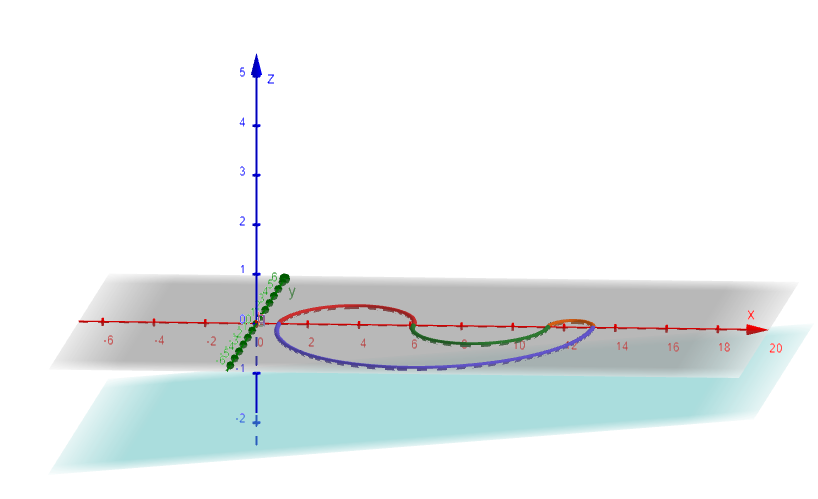

Ahora debemos determinar las regiones que se integrarán para hallar el volumen de la piscina.

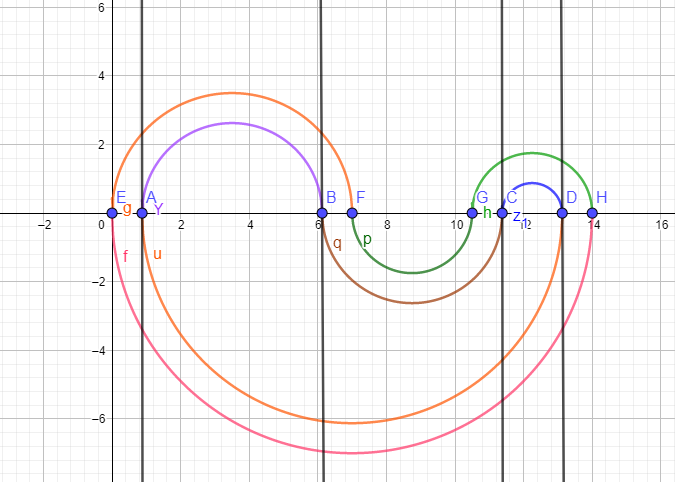

**El volumen del de la piscina estaría dado por la siguiente integral doble**.

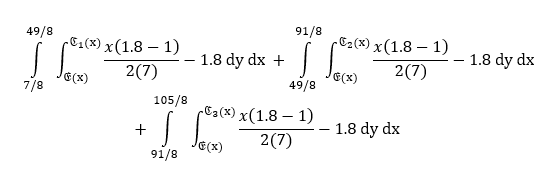

**Vamos utilizar la integral doble gaussiana**

In [18]:
def coeficientes(n):
  tabla = {}
  if n == 2:
    tabla = {1:[0.5773502692,1],2:[-0.5773502692,1]}
  elif n == 3:
          #zi -> 0      |   wi -> 1
          #.........................
    tabla = {
        1:[0.7745966692,0.5555555556],
        2:[0.0000000000,0.8888888889],
        3:[-0.7745966692,0.5555555556],
    }
  elif n == 4: 
    tabla = {
        1:[0.8611363116,0.3478548451],
        2:[0.3399810436,0.6521451549],
        3:[-0.3399810436,0.6521451549],
        4:[-0.8611363116,0.3478548451],
    }
  elif n == 5:
    tabla = {
        1:[0.9061798459,0.2369268850],
        2:[0.5384693101,0.4786286705],
        3:[0.0000000000,0.5688888889],
        4:[-0.5384693101,0.4786286705],
        5:[-0.9061798459,0.2369268850],
    }
  elif n==6 :
    tabla = {
        1:[0.9324695142,0.1713244924],
        2:[0.6612093865,0.3607615730],
        3:[0.2386191861,0.4679139346],
        4:[-0.2386191861,0.4679139346],
        5:[-0.6612093865,0.3607615730],
        6:[-0.9324695142,0.1713244924],
    }
  else:
    print("No se pudo encontrar las raices y coeficientes del polinomio")
    return None
  return tabla

In [19]:
def integral_doble_gaussiana(funcion,a,b,c,d,m,n):
  #paso 1: haga
  h1 = (b-a)/2
  h2 = (b+a)/2
  Q = 0
  J = 0
  JX = 0
  tabla1 = coeficientes(m)
  tabla2 = coeficientes(n)
  #paso 2: haga los pasos 3-5
  for i in range(1,m+1):
    #paso 3
    JX = 0
    x = h1*tabla1[i][0]+h2
    d1 = d(x)
    c1 = c(x)
    k1 = (d1 - c1)/2
    k2 = (d1 + c1)/2
    #paso 4
    for j in range(1,n+1):
      y = k1*tabla2[j][0] + k2
      Q = funcion(x,y)
      JX = JX + tabla2[j][1]*Q
    #paso 5
    J += tabla1[i][1]*k1*JX #paso final 2
  J = h1*J
  return J

Para evitar regiones negativas mejor hallamos este área equivalente en las 3 regiones.

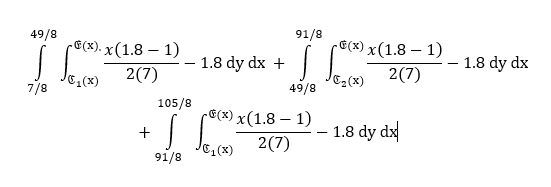

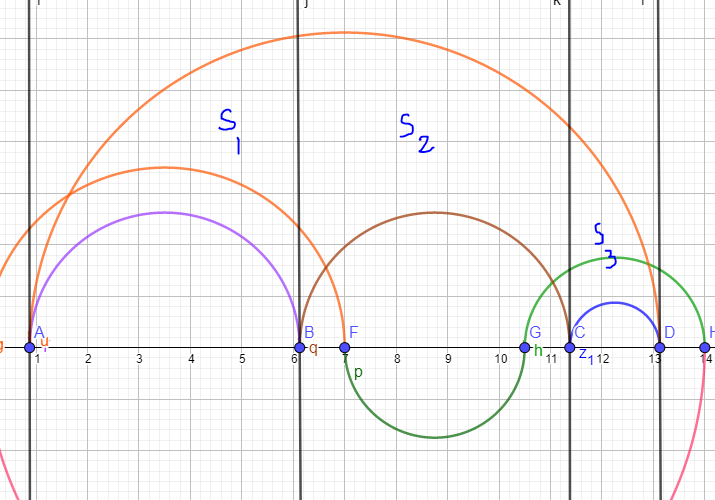

In [20]:
z = lambda x,y: (x*(0.8)/14) - 1.8
E1 = lambda x:  ((1-((x-7)/(49/8))**2)*((49/8)**2))**0.5
E2 = lambda x:  ((21/8)**2 - (x-3.5)**2)**0.5
E3 = lambda x:  ((21/8)**2 - (x-35/4)**2)**0.5
E4 = lambda x:  ((7/8)**2-(x-49/4)**2)**0.5
E5 = lambda x: E1(x) - E3(x)
zero = lambda x: 0
V = integral_doble_gaussiana(z,7/8,49/8,zero,E2,5,5) + integral_doble_gaussiana(z,7/8,49/8,zero,E1,5,5)
V += integral_doble_gaussiana(z,49/8,91/8,E3,E1,5,5) + integral_doble_gaussiana(z,91/8,105/8,zero,E4,5,5)
V += integral_doble_gaussiana(z,91/8,105/8,zero,E1,5,5)
print("El volumen de la piscina es: ",-V," m3")


El volumen de la piscina es:  87.13836287061542  m3


#**Cantidad de material antideslizante**


> Para hallar los metros cuadrados de granito que se usarán debemos restar el area del borde de la piscina menos la de la priscina.
$$A_{material}=A_{borde}-A_{piscina}$$



In [1]:
#usaremos el algoritmo de la cuadratura gaussiana:
def cuadratura_gaussiana(funcion,a,b,n):
  tabla = {}
  if n == 2:
    tabla = {1:[0.5773502692,1],2:[-0.5773502692,1]}
  elif n == 3:
          #zi -> 0      |   wi -> 1
          #.........................
    tabla = {
        1:[0.7745966692,0.5555555556],
        2:[0.0000000000,0.8888888889],
        3:[-0.7745966692,0.5555555556],
    }
  elif n == 4: 
    tabla = {
        1:[0.8611363116,0.3478548451],
        2:[0.3399810436,0.6521451549],
        3:[-0.3399810436,0.6521451549],
        4:[-0.8611363116,0.3478548451],
    }
  elif n == 5:
    tabla = {
        1:[0.9061798459,0.2369268850],
        2:[0.5384693101,0.4786286705],
        3:[0.0000000000,0.5688888889],
        4:[-0.5384693101,0.4786286705],
        5:[-0.9061798459,0.2369268850],
    }
  elif n==6 :
    tabla = {
        1:[0.9324695142,0.1713244924],
        2:[0.6612093865,0.3607615730],
        3:[0.2386191861,0.4679139346],
        4:[-0.2386191861,0.4679139346],
        5:[-0.6612093865,0.3607615730],
        6:[-0.9324695142,0.1713244924],
    }
  else:
    print("No se pudo encontrar las raices y coeficientes del polinomio")
    return None
  wF = 0
  if (a==-1) and (b==1):
    for i in range(1,n+1):
      wF += tabla[i][1]*funcion(tabla[i][0])
  else:
    for i in range(1,n+1):
      z = (((b-a)*tabla[i][0])+(b+a))/2
      wF += tabla[i][1]*funcion(z)
      print(tabla[i][1],":",tabla[i][0])
  area = ((b-a)/2) * wF
  return area

In [13]:
#primero hallaremos el area del borde
f1 = lambda x: ((1-((x-7)/7)**2)*(7**2))**0.5 #x E [0,14]
f2 = lambda x: (3.5**2 - (x-3.5)**2)**0.5 #x E [0,7]
f3 = lambda x: ((7/4)**2 - (x-(5*7/4))**2)**0.5 #x E [7,21/2]
f4 = lambda x: ((7/4)**2 - (x-(7*7/4))**2)**0.5 #x E [21/2,14]
f5 = lambda x: f1(x) - f3(x)


Ab = cuadratura_gaussiana(f1,0,7,5) +cuadratura_gaussiana(f2,0,7,5) + cuadratura_gaussiana(f5,7,21/2,5)+ cuadratura_gaussiana(f4,21/2,14,5) + cuadratura_gaussiana(f1,21/2,14,5)
print("El área del borde es: ",Ab)

0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
El área del borde es:  96.33333089436061


In [15]:
#ahora hallaremos el area de la piscina:
E1 = lambda x:  ((1-((x-7)/(49/8))**2)*((49/8)**2))**0.5
E2 = lambda x:  ((21/8)**2 - (x-3.5)**2)**0.5
E3 = lambda x:  ((21/8)**2 - (x-35/4)**2)**0.5
E4 = lambda x:  ((7/8)**2-(x-49/4)**2)**0.5
E5 = lambda x: E1(x) - E3(x)
Ap = cuadratura_gaussiana(E1,7/8,49/8,5) +cuadratura_gaussiana(E2,7/8,49/8,5) + cuadratura_gaussiana(E5,49/8,91/8,5)+ cuadratura_gaussiana(E4,91/8,105/8,5) + cuadratura_gaussiana(E1,91/8,105/8,5)
print("El área del borde es: ",Ap)



0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459
El área del borde es:  60.167769504736484


In [16]:
Cantidad_granito = Ab - Ap
print("La cantidad de material que se usará en el borde es",Cantidad_granito," m2")

La cantidad de material que se usará en el borde es 36.16556138962413  m2


El enchapado del fondo de la piscina es igual a:

In [21]:
print("Resultado:",Ap," m2")

Resultado: 60.167769504736484  m2


**Hallemos primero el área del area lateral del sólido de la elipse** Para eso dibujamos lo siguientes y analizamos que siempre la longitud de borde va cambiar con respecto al eje Z. Pero el valor del área sombreada con el área blanca equivalen lo mismo entonces asumimos que el área es:

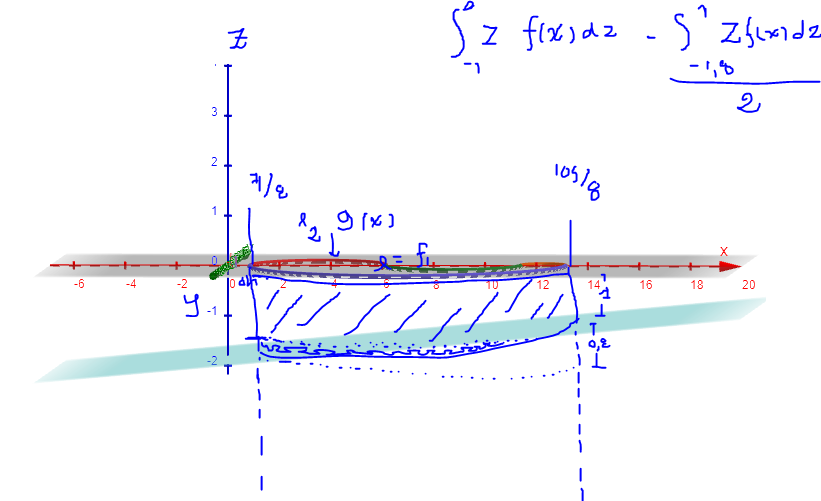

La ecuación estará dada por:
$$A_1=|\int_{-1}^{0}{\ell\ dz\ \ }|\ -\frac{|\int_{-1.8}^{-1}{\ell\ dz\ \ }|\ }{2}$$

#Resolviendo


In [33]:
A1 = longitud_de_arco(E1,7/8,15*7/8,1000) * 1 - longitud_de_arco(E1,7/8,15*7/8,1000) * 0.8/2
print("Area 1: ",A1)

Area 1:  11.545256359095568


In [36]:
a = 7
n = 1000
L =  longitud_de_arco(E2,a/8,7*a/8,n) + longitud_de_arco(E3,7*a/8,13*a/8,n) + longitud_de_arco(E4,13*a/8,15*a/8,n)
A2 = L * 1 + L*0.8/2
print("Area 2:", A2)

Area 2: 26.938931504556308


El área lateral es:

In [37]:
A1 + A2

38.484187863651876